In [1]:
pip install pygame


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install pymunk

# Normal Case

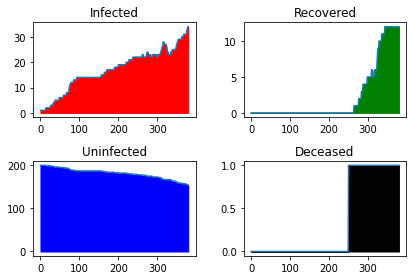

In [2]:
import pygame
import random
import pymunk
import time
import matplotlib.pyplot as plt




height = 600

width = 900

pygame.init()


display = pygame.display.set_mode((width, height))


clock = pygame.time.Clock()


space = pymunk.Space()     


# FPS
FPS=50


BLUE = ( 33, 150, 243)
BLACK = (0,0,0)
WHITE = (255,255,255)
GREEN = (100, 221, 23)
RED = (255, 92, 141)

population = 200
recovery_time=5*FPS
speed = 60
radius = 5
death_chance = 0.04
infected_count_this_frame = 1



class Wall():
    def __init__(self,p1,p2):
       
        self.body = pymunk.Body(body_type=pymunk.Body.STATIC)
        
       
        self.shape = pymunk.Segment(self.body,p1,p2,1)
        
        self.shape.elasticity = 1
        
        space.add(self.body,self.shape)




    

class Ball():
   
    def __init__(self,x,y):
       
        self.x = x
       
        self.y = y
        self.color = BLUE
    
        self.infected = False
        self.deceased = False
        self.recovery_time = 0
        
        self.body = pymunk.Body()
        self.body.position = x,y
        
        self.body.velocity = random.randint(-speed, speed), random.randint(-speed, speed)
       
       
        self.shape = pymunk.Circle(self.body,radius)
        self.shape.density = 1
        self.shape.elasticity = 1
        
        space.add(self.body,self.shape)
        
        
    
    def draw(self):

        pygame.draw.circle(display,self.color,self.body.position,radius)
        
    #To infect balls
    def infect(self,space=0,arbiter=0,data=0):
        self.infected = True
        
        self.shape.collision_type = population+1
      
        self.color = RED
       
        return True

    def recovery(self,i):

        if(self.infected):
  
            self.recovery_time += 1
        
            if(self.recovery_time > recovery_time):

                self.infected = False                
                
                if(i%(1/death_chance)==2):
              
                    self.deceased = True
                   
                    self.color = BLACK
                             
                    self.shape.density = 100000
                    self.body.velocity = 0,0
#                    Otherwise person is recovered
                else:

                    self.color = GREEN

                self.shape.collision_type =population + 2
                self.recovery_time =0

    

        
 

        
infected_count = []
# List of infected count per frame
uninfected_count = []
# List of uninfected count per frame
recovered_count = []
# List of recovered count per frame
deceased_count = []
# List of deceased count per frame


def game():
    
    balls = []
  #     list of balls
    walls = [
    #         here in the list of walls we are making four walls
#         left wall
        Wall((0,0),(0,height)),
#         top wall
        Wall((0, height), (width, height)),
#       right wall
        Wall((width, height), (width, 0)),
#         bottom wall
        Wall((width, 0), (0, 0))
        ]
    
    
    for i in range(0, population):

        balls.append(Ball(random.randint(0, width), random.randint(0, height)))

        balls[i].shape.collision_type = i

        handler = space.add_collision_handler(i,population+1)

        handler.pre_solve = balls[i].infect
        
#   at first a random ball is infected
    random.choice(balls).infect()
    

    
    


    

        
   
    while True: 
        for event in pygame.event.get():
            # quit when close button is used
            if event.type == pygame.QUIT:
                return
        
                    

       
        display.fill((255,255,255))

        
        global infected_count_this_frame
        infected_count_this_frame = 0
        uninfected_count_this_frame=0
        recovered_count_this_frame = 0
        death_count=0


        for i in range(0, population):

            balls[i].draw()

            balls[i].recovery(i)

            if balls[i].color==RED:
                infected_count_this_frame+=1

            if balls[i].color == BLACK:
                death_count+=1

            elif balls[i].color == GREEN:
                recovered_count_this_frame+=1

            elif balls[i].color == BLUE:
                uninfected_count_this_frame += 1
            
            
        infected_count.append(infected_count_this_frame)
        uninfected_count.append(uninfected_count_this_frame)
        recovered_count.append(recovered_count_this_frame)
        deceased_count.append(death_count)
        
        

     

    
      
        # update display
        pygame.display.update()
        
       
        clock.tick(FPS)

        space.step(1/FPS)



game()
pygame.quit()

# making plots
fig = plt.figure()
# dividing figure into 4 parts
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
ax1.title.set_text("Infected")
ax2.title.set_text("Recovered")
ax3.title.set_text("Uninfected")
ax4.title.set_text("Deceased")
fig.tight_layout()
ax1.plot(range(0, len(infected_count), 1), infected_count)
ax1.fill_between(range(0, len(infected_count), 1), infected_count,color="RED")
ax2.plot(range(0, len(recovered_count), 1), recovered_count)
ax2.fill_between(range(0, len(recovered_count), 1),recovered_count, color="GREEN")
ax3.plot(range(0, len(uninfected_count), 1), uninfected_count)
ax3.fill_between(range(0, len(uninfected_count), 1), uninfected_count,color="BLUE")
ax4.plot(range(0, len(deceased_count), 1), deceased_count)
ax4.fill_between(range(0, len(deceased_count), 1),deceased_count, color="BLACK")



plt.show()


